In [1]:
import pandas as pd

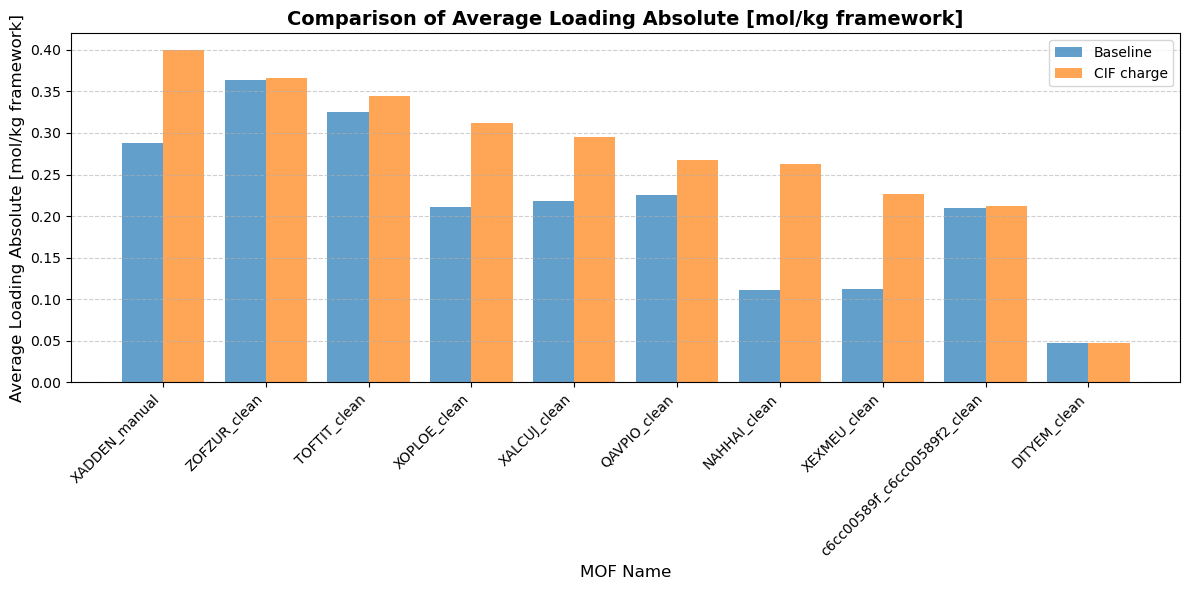

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 로드
data_base = pd.read_csv("./07result_baseline.csv")
data = pd.read_csv("./07result.csv")

# 비교할 컬럼 설정
compare_col = 'Average loading absolute [mol/kg framework]'

# 두 데이터프레임에서 동일한 'name'을 가진 MOF만 필터링
merged_data = pd.merge(data_base[['name', compare_col]], data[['name', compare_col]], on='name', suffixes=('_baseline', '_new'))

# 정렬 (loading 값이 큰 순으로 정렬)
merged_data = merged_data.sort_values(by=compare_col + '_new', ascending=False)

# 그래프 크기 설정
fig, ax = plt.subplots(figsize=(12, 6))

# X축 위치 설정
x = np.arange(len(merged_data))

# 막대 그래프 그리기
bar_width = 0.4
ax.bar(x - bar_width/2, merged_data[compare_col + '_baseline'], bar_width, label='Baseline', alpha=0.7)
ax.bar(x + bar_width/2, merged_data[compare_col + '_new'], bar_width, label='CIF charge', alpha=0.7)

# X축 설정
ax.set_xticks(x)
ax.set_xticklabels(merged_data['name'], rotation=45, ha="right", fontsize=10)

# 그래프 제목 및 라벨 설정
ax.set_title('Comparison of Average Loading Absolute [mol/kg framework]', fontsize=14, fontweight='bold')
ax.set_xlabel('MOF Name', fontsize=12)
ax.set_ylabel('Average Loading Absolute [mol/kg framework]', fontsize=12)

# 범례 추가
ax.legend()

# 그리드 추가
ax.grid(axis='y', linestyle='--', alpha=0.6)

# 여백 조정
plt.tight_layout()

# 그래프 출력
plt.show()
